# Polars Tutorial

In [2]:
import pandas as pd
import polars as pl
from pathlib import Path

# Motivation

## Separate Data from Logic
- Speed optimization
- Method chaining
- --> better code & can customize logic more extensively


## Speed
- Built-in parallelization + many other optimizations
- ~10-100X faster than pandas

<img src="assets/benchmark.png" alt="image" style="width:1000px;">

## Memory Optimization
- Larger than memory data
- More efficient storage --> can load more data into memory
- Wes McKinney's rule of thumb (pandas): "you should have 5 to 10 times as much RAM as the size of your dataset". 💀❌💀

## Syntax
- Method chaining --> one interaction with data --> better code
- Better dtypes (formal lists, structs, strict numerics)
- No more indexes!!

## Multi-Language
- Python
- Rust
- JS
- R (nascent)
- Ruby (nascent)

## Downsides
- Less popular (for now...)
    - ==> less stackoverflow/etc
    - ==> less LLM knowledge
- Can be verbose, especially at first
- Learning curve

<img src="assets/star-history-202542.png" alt="image" style="width: 800px;">
<!-- <img src="assets/benchmark.png" alt="image" style="width:1200px;"> -->


# Tutorial

## Sample Dataset

In [3]:
DATA_PATH = Path("data/trade_i_baci_a_17__2022.parquet")

### Dataset Preview

**Shape:** (11,375,504, 12)

| year | exporter_id | exporter_name | importer_id | ... | value  | quantity | unit_abbrev | unit_name   |
|------|-------------|---------------|-------------|-----|--------|----------|-------------|-------------|
| i64  | str         | str           | str         |     | f64    | f64      | str         | str         |
| 2022 | BEL         | Belgium       | POL         | ... | 328.0  | 0.019    | mt          | Metric Tons |
| 2022 | BEL         | Belgium       | POL         | ... | 54.0   | 0.026    | mt          | Metric Tons |
| 2022 | BEL         | Belgium       | POL         | ... | 690.0  | 1.022    | mt          | Metric Tons |
| 2022 | BEL         | Belgium       | POL         | ... | 159.0  | 0.061    | mt          | Metric Tons |
| 2022 | BEL         | Belgium       | POL         | ... | 219.0  | 0.184    | mt          | Metric Tons |
| ...  | ...         | ...           | ...         | ... | ...    | ...      | ...         | ...         |
| 2022 | GHA         | Ghana         | NOR         | ... | 1579.0 | 0.105    | mt          | Metric Tons |
| 2022 | GHA         | Ghana         | NOR         | ... | 2208.0 | 0.099    | mt          | Metric Tons |
| 2022 | GHA         | Ghana         | NOR         | ... | 156.0  | 0.018    | mt          | Metric Tons |
| 2022 | GHA         | Ghana         | NOR         | ... | 38.0   | 0.001    | mt          | Metric Tons |
| 2022 | GHA         | Ghana         | NOR         | ... | 644.0  | 0.007    | mt          | Metric Tons |

## Example: read data

### Pandas

In [4]:
pd_df: pd.DataFrame = pd.read_parquet(DATA_PATH)

#### Check Memory Usage

In [6]:
pd_df.memory_usage(deep=True).sum() / (1024**3)  # convert bytes to GB

np.float64(5.44419311452657)

### Polars

In [7]:
pl_df: pl.dataframe = pl.read_parquet(DATA_PATH)

#### Check Memory Usage

In [9]:
pl_df.estimated_size() / (1024**3)  # convert bytes to GB

1.290832537226379

## Example: Select Data

`["exporter_id"]`  

`["exporter_id", "exporter_name"]`

In [10]:
display(pd_df["exporter_id"])
display(pd_df[["exporter_id", "exporter_name"]])

0           BEL
1           BEL
2           BEL
3           BEL
4           BEL
           ... 
11375499    BEL
11375500    BEL
11375501    BEL
11375502    BEL
11375503    BEL
Name: exporter_id, Length: 11375504, dtype: object

,exporter_id,exporter_name
0,BEL,Belgium
1,BEL,Belgium
2,BEL,Belgium
3,BEL,Belgium
4,BEL,Belgium
...,...,...
11375499,BEL,Belgium
11375500,BEL,Belgium
11375501,BEL,Belgium
11375502,BEL,Belgium


In [12]:
display(pl_df["exporter_id"])
display(pl_df.select(pl.col(["exporter_id", "exporter_name"])))

exporter_id
str
"""BEL"""
"""BEL"""
"""BEL"""
"""BEL"""
"""BEL"""
…
"""BEL"""
"""BEL"""
"""BEL"""


exporter_id,exporter_name
str,str
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""
…,…
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""
"""BEL""","""Belgium"""


### Select data by type

string columns

In [13]:
pl_df.select(pl.col(pl.String))

exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,unit_abbrevation,unit_name
str,str,str,str,str,str,str,str
"""BEL""","""Belgium""","""POL""","""Poland""","""110412""","""Oats, rolled or flaked grains""","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""POL""","""Poland""","""110419""","""Cereals, rolled or flaked grai…","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""POL""","""Poland""","""110423""","""Maize (corn), hulled, pearled,…","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""POL""","""Poland""","""110429""","""Cereals, hulled, pearled, slic…","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""POL""","""Poland""","""110430""","""Germ of cereals, whole, rolled…","""mt""","""Metric Tons"""
…,…,…,…,…,…,…,…
"""BEL""","""Belgium""","""NOR""","""Norway""","""960810""","""Ball point pens""","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""NOR""","""Norway""","""960820""","""Felt tipped, other porous-tipp…","""mt""","""Metric Tons"""
"""BEL""","""Belgium""","""NOR""","""Norway""","""960830""","""Pens: fountain, stylograph and…","""mt""","""Metric Tons"""


### What's this `pl.col()` stuff??

- `pl.Expr`
- Instruction; not data
- Building blocks

### Select Modified Data

Example 1: select a string column and split it into a list column, on the letter "L"

Example 2: Example 1 + take the first element of the resulting arrays

In [14]:
display(pd_df["exporter_id"].str.split("L"))

0           [BE, ]
1           [BE, ]
2           [BE, ]
3           [BE, ]
4           [BE, ]
             ...  
11375499    [BE, ]
11375500    [BE, ]
11375501    [BE, ]
11375502    [BE, ]
11375503    [BE, ]
Name: exporter_id, Length: 11375504, dtype: object

In [15]:
display(pd_df["exporter_id"].str.split("L").str[0])

0           BE
1           BE
2           BE
3           BE
4           BE
            ..
11375499    BE
11375500    BE
11375501    BE
11375502    BE
11375503    BE
Name: exporter_id, Length: 11375504, dtype: object

In [16]:
display(pl_df["exporter_id"].str.split("L"))

exporter_id
list[str]
"[""BE"", """"]"
"[""BE"", """"]"
"[""BE"", """"]"
"[""BE"", """"]"
"[""BE"", """"]"
…
"[""BE"", """"]"
"[""BE"", """"]"
"[""BE"", """"]"


In [17]:
display(pl_df["exporter_id"].str.split("L").list[0])

exporter_id
str
"""BE"""
"""BE"""
"""BE"""
"""BE"""
"""BE"""
…
"""BE"""
"""BE"""
"""BE"""


## Example: Filter (Substring Search)

find `cocoa` in the `product_name` column (case-insensitive)

In [18]:
pd_df[pd_df["product_name"].str.contains("(?i)cocoa", regex=True)]

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
132,2022,BEL,Belgium,POL,Poland,170490,"Sugar confectionery not chewing gum, no cocoa ...",5,12240173.0,3979.908,mt,Metric Tons
133,2022,BEL,Belgium,POL,Poland,180100,"Cocoa Beans (Raw/Roasted, Whole/Broken)",5,259016.0,55.680,mt,Metric Tons
134,2022,BEL,Belgium,POL,Poland,180310,Cocoa Paste (Not Defatted),5,16229270.0,4966.386,mt,Metric Tons
135,2022,BEL,Belgium,POL,Poland,180400,Cocoa Butter/Fat/Oil,5,681104.0,97.448,mt,Metric Tons
136,2022,BEL,Belgium,POL,Poland,180500,Unsweetened Cocoa Powder,5,227664.0,79.976,mt,Metric Tons
...,...,...,...,...,...,...,...,...,...,...,...,...
11372639,2022,BEL,Belgium,NOR,Norway,180690,Miscellaneous Chocolate/Cocoa Preparations,5,9337696.0,861.713,mt,Metric Tons
11372641,2022,BEL,Belgium,NOR,Norway,190190,Malt extract & limited cocoa pastrycooks produ...,5,2733112.0,887.466,mt,Metric Tons
11372653,2022,BEL,Belgium,NOR,Norway,190531,"Food preparations: sweet biscuits, whether or ...",5,245947.0,60.962,mt,Metric Tons
11372654,2022,BEL,Belgium,NOR,Norway,190532,"Food preparations: waffles and wafers, whether...",5,438722.0,121.019,mt,Metric Tons


In [19]:
display(pl_df.filter(pl.col("product_name").str.contains("(?i)cocoa")))

year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
i64,str,str,str,str,str,str,i64,f64,f64,str,str
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""170490""","""Sugar confectionery not chewin…",5,1.2240173e7,3979.908,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""180100""","""Cocoa Beans (Raw/Roasted, Whol…",5,259016.0,55.68,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""180310""","""Cocoa Paste (Not Defatted)""",5,1.622927e7,4966.386,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""180400""","""Cocoa Butter/Fat/Oil""",5,681104.0,97.448,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""180500""","""Unsweetened Cocoa Powder""",5,227664.0,79.976,"""mt""","""Metric Tons"""
…,…,…,…,…,…,…,…,…,…,…,…
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""180690""","""Miscellaneous Chocolate/Cocoa …",5,9.337696e6,861.713,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""190190""","""Malt extract & limited cocoa p…",5,2.733112e6,887.466,"""mt""","""Metric Tons"""
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""190531""","""Food preparations: sweet biscu…",5,245947.0,60.962,"""mt""","""Metric Tons"""


## Example: Group



In [20]:
pd_df.groupby("exporter_id").agg({"value": "sum", "quantity": ["sum", "mean"]})

value      quantity             
                      sum           sum         mean
exporter_id                                         
ABW          4.271220e+07  3.990741e+04    37.088674
AFG          1.520468e+09  5.440034e+06   962.837931
AGO          5.380631e+10  6.968337e+07  4878.762922
AIA          2.508270e+07  4.365993e+03     6.635248
ALB          4.352923e+09  3.175407e+06   189.893958
...                   ...           ...          ...
YEM          1.761144e+09  2.043993e+06  1196.717094
ZAF          1.544890e+11  2.150749e+08  1441.482417
ZMB          1.504280e+10  7.409465e+06   717.554230
ZWE          8.381471e+09  2.668969e+06   419.319638
\N           5.560721e+11  5.965386e+07   325.553974

[226 rows x 3 columns]

In [24]:
display(
    pl_df.group_by("exporter_id").agg(
        pl.col("value").sum(),
        pl.col("quantity").sum(),
        pl.col("quantity").mean().alias("q_mean"),
        q_mean_2=pl.col("quantity").mean(),
    )
)

exporter_id,value,quantity,q_mean,q_mean_2
str,f64,f64,f64,f64
"""BWA""",8.2688e9,2.3811e6,261.747694,261.747694
"""CHE""",3.8675e11,2.8814e7,143.666802,143.666802
"""GAB""",8.0270e9,1.6621e7,7393.891648,7393.891648
"""ABW""",4.27122e7,39907.413,37.088674,37.088674
"""POL""",3.4626e11,1.2534e8,535.985852,535.985852
…,…,…,…,…
"""CYM""",6.72100819e8,115577.658,84.85878,84.85878
"""CZE""",2.3035e11,7.3843e7,406.100779,406.100779
"""GMB""",1.70676159e8,162954.19,166.619826,166.619826


## Example: Add a column

In [25]:
pd_df.assign(price_per_unit=(pd_df["value"] / pd_df["quantity"]))

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name,price_per_unit
0,2022,BEL,Belgium,POL,Poland,110412,"Oats, rolled or flaked grains",5,328.0,0.019,mt,Metric Tons,17263.157895
1,2022,BEL,Belgium,POL,Poland,110419,"Cereals, rolled or flaked grains nes",5,54.0,0.026,mt,Metric Tons,2076.923077
2,2022,BEL,Belgium,POL,Poland,110423,"Maize (corn), hulled, pearled, sliced or kibbled",5,690.0,1.022,mt,Metric Tons,675.146771
3,2022,BEL,Belgium,POL,Poland,110429,"Cereals, hulled, pearled, sliced or kibbled nes",5,159.0,0.061,mt,Metric Tons,2606.557377
4,2022,BEL,Belgium,POL,Poland,110430,"Germ of cereals, whole, rolled, flaked or ground",5,219.0,0.184,mt,Metric Tons,1190.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11375499,2022,BEL,Belgium,NOR,Norway,960810,Ball point pens,5,1579.0,0.105,mt,Metric Tons,15038.095238
11375500,2022,BEL,Belgium,NOR,Norway,960820,"Felt tipped, other porous-tipped pens and markers",5,2208.0,0.099,mt,Metric Tons,22303.030303
11375501,2022,BEL,Belgium,NOR,Norway,960830,"Pens: fountain, stylograph and other pens",5,156.0,0.018,mt,Metric Tons,8666.666667
11375502,2022,BEL,Belgium,NOR,Norway,960850,Sets of mixed types of pens/pencils,5,38.0,0.001,mt,Metric Tons,38000.000000


In [29]:
display(
    pl_df.with_columns(
        (pl.col("value") / pl.col("quantity")).alias("price_per_unit"),
    )
)

year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name,price_per_unit
i64,str,str,str,str,str,str,i64,f64,f64,str,str,f64
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""110412""","""Oats, rolled or flaked grains""",5,328.0,0.019,"""mt""","""Metric Tons""",17263.157895
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""110419""","""Cereals, rolled or flaked grai…",5,54.0,0.026,"""mt""","""Metric Tons""",2076.923077
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""110423""","""Maize (corn), hulled, pearled,…",5,690.0,1.022,"""mt""","""Metric Tons""",675.146771
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""110429""","""Cereals, hulled, pearled, slic…",5,159.0,0.061,"""mt""","""Metric Tons""",2606.557377
2022,"""BEL""","""Belgium""","""POL""","""Poland""","""110430""","""Germ of cereals, whole, rolled…",5,219.0,0.184,"""mt""","""Metric Tons""",1190.217391
…,…,…,…,…,…,…,…,…,…,…,…,…
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""960810""","""Ball point pens""",5,1579.0,0.105,"""mt""","""Metric Tons""",15038.095238
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""960820""","""Felt tipped, other porous-tipp…",5,2208.0,0.099,"""mt""","""Metric Tons""",22303.030303
2022,"""BEL""","""Belgium""","""NOR""","""Norway""","""960830""","""Pens: fountain, stylograph and…",5,156.0,0.018,"""mt""","""Metric Tons""",8666.666667


### Complex Query

1. filter `exporter_id` contains "A|B"  
& (`product_name`) starts OR ends with "s"

2. add a `price_per_unit` column

3. group by `["year", "exporter_id", "importer_id"]`

4. sum `value`

In [30]:
def complex_query_pd(df: pd.DataFrame) -> pd.DataFrame:
    return (
        df[
            df["exporter_id"].str.contains("A|B")
            & (
                df["product_name"].str.endswith("s")
                | df["product_name"].str.startswith("s")
            )
        ]
        .assign(price_per_unit=(pd_df["value"] / pd_df["quantity"]))
        .groupby(["year", "exporter_id", "importer_id"])
        .agg({"value": "sum"})
    )

In [31]:
pd_df.pipe(complex_query_pd)

value
year exporter_id importer_id            
2022 ABW         ARE            154217.0
                 ARG                17.0
                 AUT             97308.0
                 BEL             57272.0
                 BGR               553.0
...                                  ...
     ZMB         USA           6299784.0
                 VNM          10214188.0
                 ZAF          52192870.0
                 ZWE          72761055.0
                 \N           66323218.0

[9621 rows x 1 columns]

In [ ]:
def complex_query_pl(df: pl.DataFrame) -> pl.DataFrame:
    return (
        df.filter(
            (pl.col("exporter_id").str.contains("A|B"))
            & (
                pl.col("product_name").str.starts_with("s")
                | pl.col("product_name").str.ends_with("s")
            )
        )
        .with_columns(
            (pl.col("value") / pl.col("quantity")).alias("price_per_unit"),
        )
        .group_by(["year", "exporter_id", "importer_id"])
        .agg(pl.col("value").sum())
    ).sort(["year", "exporter_id", "importer_id"])

In [37]:
complex_query_pl(pl_df)

year,exporter_id,importer_id,value
i64,str,str,f64
2022,"""ABW""","""ARE""",154217.0
2022,"""ABW""","""ARG""",17.0
2022,"""ABW""","""AUT""",97308.0
2022,"""ABW""","""BEL""",57272.0
2022,"""ABW""","""BGR""",553.0
…,…,…,…
2022,"""ZMB""","""USA""",6.299784e6
2022,"""ZMB""","""VNM""",1.0214188e7
2022,"""ZMB""","""ZAF""",5.219287e7


### Complex Query — Lazy!?

In [46]:
def complex_query_pl_lf(lf: pl.LazyFrame) -> pl.LazyFrame:
    return (
        lf.filter(
            (pl.col("exporter_id").str.contains("A|B"))
            & (
                pl.col("product_name").str.starts_with("s")
                | pl.col("product_name").str.ends_with("s")
            )
        )
        .with_columns(price_per_unit=(pl.col("value") / pl.col("quantity")))
        .group_by(["year", "exporter_id", "importer_id"])
        .agg(pl.col("value").sum())
    ).sort(["year", "exporter_id", "importer_id"])

In [39]:
pl_df.lazy()

In [40]:
complex_query_output_lf = complex_query_pl_lf(pl_df.lazy())

In [42]:
complex_query_output_lf

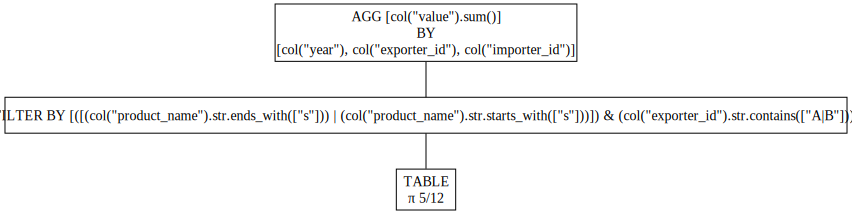

In [44]:
complex_query_output_lf.show_graph()

In [47]:
complex_query_output_lf.collect()

year,exporter_id,importer_id,value
i64,str,str,f64
2022,"""BMU""","""ITA""",312226.0
2022,"""BTN""","""PER""",30955.0
2022,"""BHS""","""DOM""",1983.0
2022,"""AGO""","""AZE""",243556.0
2022,"""FRA""","""BMU""",2.825409e6
…,…,…,…
2022,"""MAR""","""IRL""",4.3297377e7
2022,"""MAC""","""KGZ""",876.0
2022,"""MAC""","""TLS""",11253.0


### Complex Query — From Disk

Repeat the complex query—including reading the data in from disk—but only `"scan"` the polars data before performing the complex query

#### pandas

In [48]:
def complex_query_from_disk_pd() -> pd.DataFrame:
    df = pd.read_parquet(DATA_PATH)
    return (
        df[
            df["exporter_id"].str.contains("A|B")
            & (
                df["product_name"].str.endswith("s")
                | df["product_name"].str.startswith("s")
            )
        ]
        .assign(price_per_unit=(pd_df["value"] / pd_df["quantity"]))
        .groupby(["year", "exporter_id", "importer_id"])
        .agg({"value": "sum"})
    )

In [49]:
complex_query_from_disk_pd()

value
year exporter_id importer_id            
2022 ABW         ARE            154217.0
                 ARG                17.0
                 AUT             97308.0
                 BEL             57272.0
                 BGR               553.0
...                                  ...
     ZMB         USA           6299784.0
                 VNM          10214188.0
                 ZAF          52192870.0
                 ZWE          72761055.0
                 \N           66323218.0

[9621 rows x 1 columns]

#### polars

In [55]:
pl.scan_parquet(DATA_PATH)

In [58]:
def complex_query_pl_from_disk() -> pl.LazyFrame:
    lf: pl.LazyFrame = pl.scan_parquet(DATA_PATH)
    return (
        lf.filter(
            (pl.col("exporter_id").str.contains("A|B"))
            & (
                pl.col("product_name").str.ends_with("s")
                | pl.col("product_name").str.starts_with("s")
            )
        )
        .with_columns((pl.col("value") / pl.col("quantity")).alias("price_per_unit"))
        .group_by(["year", "exporter_id", "importer_id"])
        .agg(pl.col("value").sum())
    ).sort(["year", "exporter_id", "importer_id"])

In [59]:
complex_query_pl_from_disk()

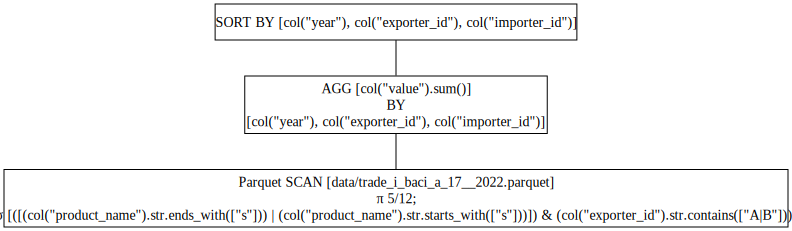

In [60]:
complex_query_pl_from_disk().show_graph()

In [61]:
complex_query_pl_from_disk().collect()

year,exporter_id,importer_id,value
i64,str,str,f64
2022,"""ABW""","""ARE""",154217.0
2022,"""ABW""","""ARG""",17.0
2022,"""ABW""","""AUT""",97308.0
2022,"""ABW""","""BEL""",57272.0
2022,"""ABW""","""BGR""",553.0
…,…,…,…
2022,"""ZMB""","""USA""",6.299784e6
2022,"""ZMB""","""VNM""",1.0214188e7
2022,"""ZMB""","""ZAF""",5.219287e7


In [ ]:
# sink_parquet()